In [291]:
import sys,array
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'

In [292]:
f = '/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/MCBNBCos/backgrounds_mcbnbcos_ana.root'

t = rn.root2array(f,treename='tree')
df = pd.DataFrame(t)

print df.shape

(554, 23)


In [293]:
cos_v = df.query('bkgd_id == 1')
cc1pi0_v = df.query('bkgd_id == 2')
cc0pi0_v = df.query('bkgd_id == 3')
nc1pi0_v = df.query('bkgd_id == 4')
nc0pi0_v = df.query('bkgd_id == 5')
oth_v = df.query('bkgd_id == 6')

#print cos_v.shape[0] + nc_v.shape[0] + mult_v.shape[0] + sig_v.shape[0] + ccoth_v.shape[0] + test_v.shape[0]

colors_tst = ['purple','yellow','lime','green','lightskyblue','salmon'] #magenta','tan']
labels_tst = ['Other','Cosmic','NC 1-$\pi^0$','NC 0-$\pi^0$','CC 0-$\pi^0$','Signal']

In [294]:
print nc0pi0_v.shape

(11, 23)


In [295]:
tot_on = 543584 #541554 #525613
tot_off = 301061 #218466 #379202
tot_bnbcos = 232250 #384200 #101600

scale_intime = 10.279 
int_per_1e20POT = 99035.2 
dataPOT = 0.495 * (tot_on) / 567157 #547616  
mcbnbcos_POT = float(tot_bnbcos)/int_per_1e20POT 

off_to_on = 1.23 * (400675./tot_off) * (tot_on/567157.)
mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on

oth_w = [ mc_to_onbeam for i in xrange(len(oth_v['pi0_mass'].values)) ] 
cos_w = [ mc_to_onbeam for i in xrange(len(cos_v['pi0_mass'].values)) ] 
nc0pi0_w = [ mc_to_onbeam for i in xrange(len(nc0pi0_v['pi0_mass'].values)) ] 
nc1pi0_w = [ mc_to_onbeam for i in xrange(len(nc1pi0_v['pi0_mass'].values)) ] 
cc0pi0_w = [ mc_to_onbeam for i in xrange(len(cc0pi0_v['pi0_mass'].values)) ] 
sig_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_v['pi0_mass'].values)) ] 

weights = [oth_w,cos_w,nc1pi0_w,nc0pi0_w,cc0pi0_w,sig_w]

all_w = [ mc_to_onbeam for i in xrange(len(df['pi0_mass'].values)) ] 

POTS :  0.474426093657 2.34512577346
MC to OnBeam :  0.202303048743
Off to OnBeam:  1.56893960342


In [296]:
on ='/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/OnBeam/pi0_onbeam_ana.root'
off='/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/OffBeam/pi0_offbeam_ana.root'

a = rn.root2array(on,treename='pi0_selection')
df0 = pd.DataFrame(a)

b = rn.root2array(off,treename='pi0_selection')
df1 = pd.DataFrame(b)

In [297]:
df1.head()

,_event,_pi0_mass,_pi0_mom,_pi0_oangle,_pi0_low_shrE,_pi0_high_shrE,_pi0_low_radL,_pi0_high_radL,_mu_mom,_mu_len,_mu_angle,_mu_phi,_mult
0,2,179.908691,275.615173,1.795836,46.875420,282.261108,7.979428,7.933995,1.0,38.237965,1.981274,-0.755655,2.0
1,114,78.310799,83.490868,1.838558,28.061848,86.407822,28.716513,26.891037,1.0,19.365713,0.040107,-2.703988,1.0
2,116,158.605621,106.286362,2.920986,43.050365,147.875107,10.651899,0.278917,1.0,35.864750,0.437086,2.060393,1.0
3,136,110.029518,149.853439,1.386036,57.954082,127.955978,5.538480,26.231491,1.0,18.011467,0.823290,3.029798,2.0
4,174,34.830009,172.980255,0.714763,15.386880,161.065094,34.657352,5.892071,1.0,24.793470,0.239552,0.133593,1.0


In [298]:
nbins = 25
Emax = 400

x_on, y_on = np.histogram(df0._pi0_mass.values,bins=nbins,range=(0,500))
x_off, y_off = np.histogram(df1._pi0_mass.values,bins=nbins,range=(0,500))
x_bnb, y_bnb = np.histogram(df.pi0_mass.values,bins=nbins,range=(0,500))

bins = (y_off[:-1] + y_off[1:])/2
bin_width = bins[1]-bins[0]

bnbcos_m = x_bnb * mc_to_onbeam 
off_min_on_m = x_on - x_off*off_to_on

off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

err_on = np.sqrt(x_on)
err_off = np.sqrt(x_off)
err_data = np.sqrt(err_on * err_on + err_off * err_off)
err_mc = np.sqrt(bnbcos_m)

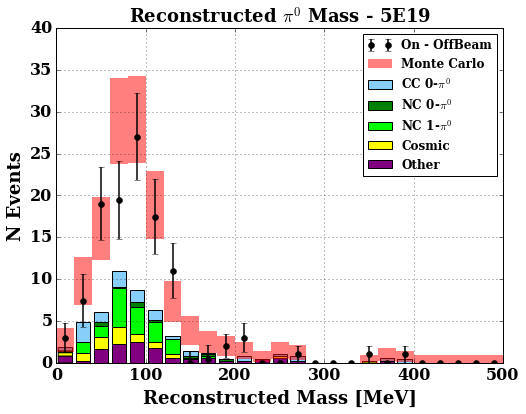

In [299]:
nbins = 20

fig,ax = plt.subplots(figsize=(8,6))
ax.hist([oth_v['pi0_mass'].values,cos_v['pi0_mass'].values,nc1pi0_v['pi0_mass'].values,nc0pi0_v['pi0_mass'].values,\
          cc0pi0_v['pi0_mass'].values],bins=nbins,label=labels_tst[:-1],color=colors_tst[:-1],stacked=True,\
         range=(0,400),weights=weights[:-1])
plt.bar(bins - bin_width/2,err_mc*2,bin_width,bottom = bnbcos_m - err_mc/2.,\
        alpha=0.5, color='r', linewidth=0,label='Monte Carlo')
plt.errorbar(bins,off_min_on_m,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
plt.grid(True)
plt.xlabel('Reconstructed Mass [MeV]',fontsize=18,weight='bold')
plt.ylabel('N Events',fontsize=18,weight='bold')
plt.title('Reconstructed $\pi^0$ Mass - 5E19',fontweight='bold',fontsize=18)
handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12)
plt.ylim(0,40)
plt.savefig('Plots/Physics_pi0_pi0_mass.png')


In [300]:
nbins = 20
Emax = 400

x_on, y_on = np.histogram(df0._pi0_oangle.values,bins=nbins,range=(0,3.2))
x_off, y_off = np.histogram(df1._pi0_oangle.values,bins=nbins,range=(0,3.2))
x_bnb, y_bnb = np.histogram(df.pi0_oangle.values,bins=nbins,range=(0,3.2))


bins = (y_off[:-1] + y_off[1:])/2
bin_width = bins[1]-bins[0]

bnbcos_m = x_bnb * mc_to_onbeam 
off_min_on_m = x_on - x_off*off_to_on

off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

err_on = np.sqrt(x_on)
err_off = np.sqrt(x_off)
err_data = np.sqrt(err_on * err_on + err_off * err_off)
err_mc = np.sqrt(bnbcos_m)

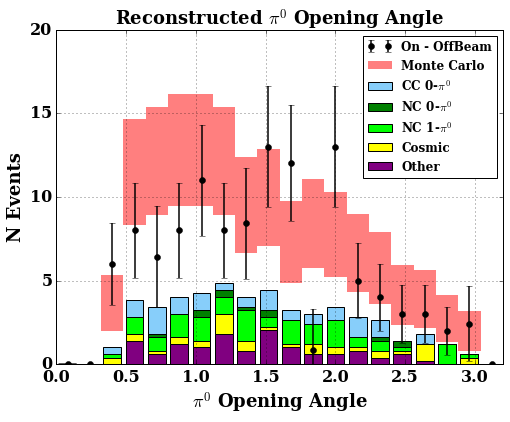

In [301]:
nbins = 20

var = 'pi0_oangle'

#plt.figure(figsize=(10,8))
fig,ax = plt.subplots(figsize=(8,6))
ax.hist([oth_v[var].values,cos_v[var].values,nc1pi0_v[var].values,nc0pi0_v[var].values,\
          cc0pi0_v[var].values],bins=nbins,label=labels_tst[:-1],color=colors_tst[:-1],stacked=True,\
         range=(0,3.2),weights=weights[:-1])
plt.bar(bins - bin_width/2,err_mc*2,bin_width,bottom = bnbcos_m - err_mc/2.,\
        alpha=0.5, color='r', linewidth=0,label='Monte Carlo')
plt.errorbar(bins,off_min_on_m,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12)#,loc='upper left',bbox_to_anchor=(1,0.9))
plt.grid(True)
plt.xlim(0,3.2)
plt.ylim(0,20)
plt.title('Reconstructed $\pi^0$ Opening Angle',fontweight='bold',fontsize=18)
plt.xlabel('$\pi^0$ Opening Angle',fontsize=18,weight='bold')
plt.ylabel('N Events',fontsize=18,weight='bold')
plt.savefig('Plots/Physics_pi0_pi0_oangle.png')

In [302]:
nbins = 20
Emax = 400

x_on, y_on = np.histogram(df0._pi0_mom.values,bins=nbins,range=(0,1000))
x_off, y_off = np.histogram(df1._pi0_mom.values,bins=nbins,range=(0,1000))
x_bnb, y_bnb = np.histogram(df.pi0_mom.values,bins=nbins,range=(0,1000))

bins = (y_off[:-1] + y_off[1:])/2
bin_width = bins[1]-bins[0]

bnbcos_m = x_bnb * mc_to_onbeam 
off_min_on_m = x_on - x_off*off_to_on

off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

err_on = np.sqrt(x_on)
err_off = np.sqrt(x_off)
err_data = np.sqrt(err_on * err_on + err_off * err_off)
err_mc = np.sqrt(bnbcos_m)

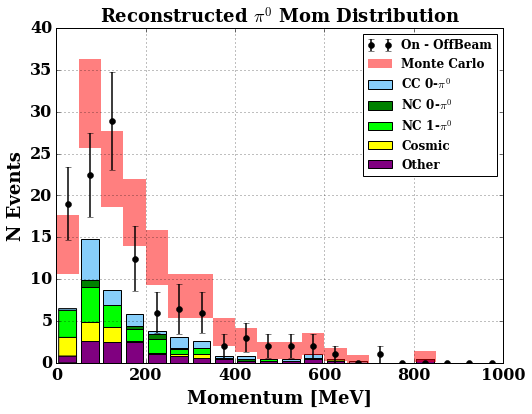

In [303]:
nbins = 20
var = 'pi0_mom'

fig,ax = plt.subplots(figsize=(8,6))
ax.hist([oth_v[var].values,cos_v[var].values,nc1pi0_v[var].values,nc0pi0_v[var].values,\
          cc0pi0_v[var].values],bins=nbins,label=labels_tst[:-1],color=colors_tst[:-1],stacked=True,\
         range=(0,1000),weights=weights[:-1])
plt.bar(bins - bin_width/2,err_mc*2,bin_width,bottom = bnbcos_m - err_mc/2.,\
        alpha=0.5, color='r', linewidth=0,label='Monte Carlo')
plt.errorbar(bins,off_min_on_m,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12)#,loc='upper left',bbox_to_anchor=(1,0.9))
plt.grid(True)
plt.ylim(0,40)
plt.title('Reconstructed $\pi^0$ Mom Distribution',fontweight='bold',fontsize=18)
plt.xlabel('Momentum [MeV]',fontsize=18,weight='bold')
plt.ylabel('N Events',fontsize=18,weight='bold')
plt.savefig('Plots/Physics_pi0_pi0_mom.png')

In [304]:
nbins = 25

x_on, y_on = np.histogram(df0._pi0_low_shrE.values,bins=nbins,range=(0,350))
x_off, y_off = np.histogram(df1._pi0_low_shrE.values,bins=nbins,range=(0,350))
x_bnb, y_bnb = np.histogram(df.pi0_low_shrE.values,bins=nbins,range=(0,350))

bins = (y_off[:-1] + y_off[1:])/2
bin_width = bins[1]-bins[0]

bnbcos_m = x_bnb * mc_to_onbeam 
off_min_on_m = x_on - x_off*off_to_on

off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

err_on = np.sqrt(x_on)
err_off = np.sqrt(x_off)
err_data = np.sqrt(err_on * err_on + err_off * err_off)
err_mc = np.sqrt(bnbcos_m)

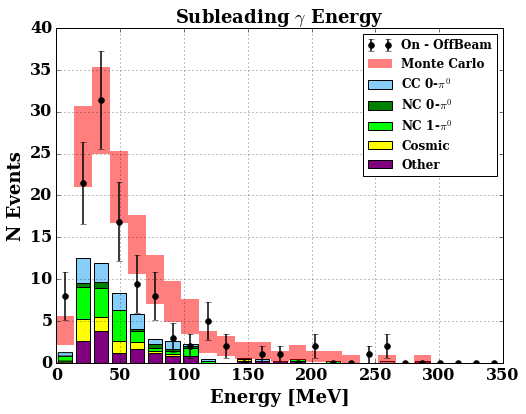

In [305]:
var = 'pi0_low_shrE'

fig,ax = plt.subplots(figsize=(8,6))
ax.hist([oth_v[var].values,cos_v[var].values,nc1pi0_v[var].values,nc0pi0_v[var].values,\
          cc0pi0_v[var].values],bins=nbins,label=labels_tst[:-1],color=colors_tst[:-1],stacked=True,\
         range=(0,350),weights=weights[:-1])
plt.bar(bins - bin_width/2,err_mc*2,bin_width,bottom = bnbcos_m - err_mc/2.,\
        alpha=0.5, color='r', linewidth=0,label='Monte Carlo')
plt.errorbar(bins,off_min_on_m,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12)#,loc='upper left',bbox_to_anchor=(1,0.9))
plt.grid(True)
plt.ylim(0,40)
plt.title('Subleading $\\gamma$ Energy',fontweight='bold',fontsize=18)
plt.xlabel('Energy [MeV]',fontsize=18,weight='bold')
plt.ylabel('N Events',fontsize=18,weight='bold')
plt.savefig('Plots/Physics_pi0_pi0_subleading_photon_E.png')

In [306]:
nbins = 25

x_on, y_on = np.histogram(df0._pi0_high_shrE.values,bins=nbins,range=(0,800))
x_off, y_off = np.histogram(df1._pi0_high_shrE.values,bins=nbins,range=(0,800))
x_bnb, y_bnb = np.histogram(df.pi0_high_shrE.values,bins=nbins,range=(0,800))

bins = (y_off[:-1] + y_off[1:])/2
bin_width = bins[1]-bins[0]

bnbcos_m = x_bnb * mc_to_onbeam 
off_min_on_m = x_on - x_off*off_to_on

off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

err_on = np.sqrt(x_on)
err_off = np.sqrt(x_off)
err_data = np.sqrt(err_on * err_on + err_off * err_off)
err_mc = np.sqrt(bnbcos_m)

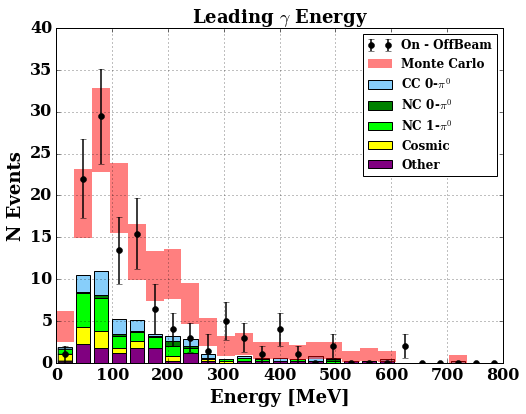

In [307]:
var = 'pi0_high_shrE'

fig,ax = plt.subplots(figsize=(8,6))
ax.hist([oth_v[var].values,cos_v[var].values,nc1pi0_v[var].values,nc0pi0_v[var].values,\
          cc0pi0_v[var].values],bins=nbins,label=labels_tst[:-1],color=colors_tst[:-1],stacked=True,\
         range=(0,800),weights=weights[:-1])
plt.bar(bins - bin_width/2,err_mc*2,bin_width,bottom = bnbcos_m - err_mc/2.,\
        alpha=0.5, color='r', linewidth=0,label='Monte Carlo')
plt.errorbar(bins,off_min_on_m,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12)#,loc='upper left',bbox_to_anchor=(1,0.9))
plt.grid(True)
plt.ylim(0,40)
plt.title('Leading $\\gamma$ Energy',fontweight='bold',fontsize=18)
plt.xlabel('Energy [MeV]',fontsize=18,weight='bold')
plt.ylabel('N Events',fontsize=18,weight='bold')
plt.savefig('Plots/Physics_pi0_pi0_leading_photon_E.png')

In [308]:
nbins = 25

x_on, y_on = np.histogram(df0._pi0_high_radL.values,bins=nbins,range=(0,60))
x_off, y_off = np.histogram(df1._pi0_high_radL.values,bins=nbins,range=(0,60))
x_bnb, y_bnb = np.histogram(df.pi0_high_radL.values,bins=nbins,range=(0,60))

bins = (y_off[:-1] + y_off[1:])/2
bin_width = bins[1]-bins[0]

bnbcos_m = x_bnb * mc_to_onbeam 
off_min_on_m = x_on - x_off*off_to_on

off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

err_on = np.sqrt(x_on)
err_off = np.sqrt(x_off)
err_data = np.sqrt(err_on * err_on + err_off * err_off)
err_mc = np.sqrt(bnbcos_m)

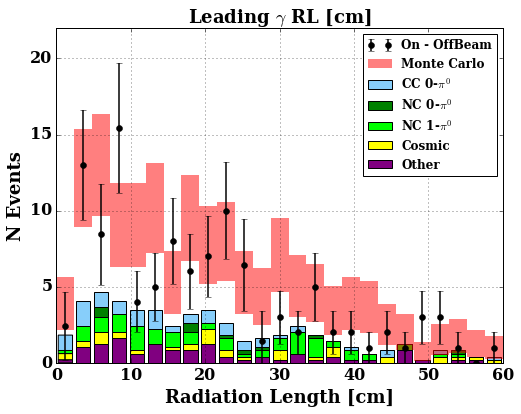

In [309]:
var = 'pi0_high_radL'

fig,ax = plt.subplots(figsize=(8,6))
ax.hist([oth_v[var].values,cos_v[var].values,nc1pi0_v[var].values,nc0pi0_v[var].values,\
          cc0pi0_v[var].values],bins=nbins,label=labels_tst[:-1],color=colors_tst[:-1],stacked=True,\
         range=(0,60),weights=weights[:-1])
plt.bar(bins - bin_width/2,err_mc*2,bin_width,bottom = bnbcos_m - err_mc/2.,\
        alpha=0.5, color='r', linewidth=0,label='Monte Carlo')
plt.errorbar(bins,off_min_on_m,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12)#,loc='upper left',bbox_to_anchor=(1,0.9))
plt.grid(True)
plt.ylim(0,22)
plt.title('Leading $\\gamma$ RL [cm]',fontweight='bold',fontsize=18)
plt.xlabel('Radiation Length [cm]',fontsize=18,weight='bold')
plt.ylabel('N Events',fontsize=18,weight='bold')
plt.savefig('Plots/Physics_pi0_pi0_leading_photon_RL.png')

In [310]:
nbins = 25

x_on, y_on = np.histogram(df0._pi0_low_radL.values,bins=nbins,range=(0,60))
x_off, y_off = np.histogram(df1._pi0_low_radL.values,bins=nbins,range=(0,60))
x_bnb, y_bnb = np.histogram(df.pi0_low_radL.values,bins=nbins,range=(0,60))

bins = (y_off[:-1] + y_off[1:])/2
bin_width = bins[1]-bins[0]

bnbcos_m = x_bnb * mc_to_onbeam 
off_min_on_m = x_on - x_off*off_to_on

off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

err_on = np.sqrt(x_on)
err_off = np.sqrt(x_off)
err_data = np.sqrt(err_on * err_on + err_off * err_off)
err_mc = np.sqrt(bnbcos_m)

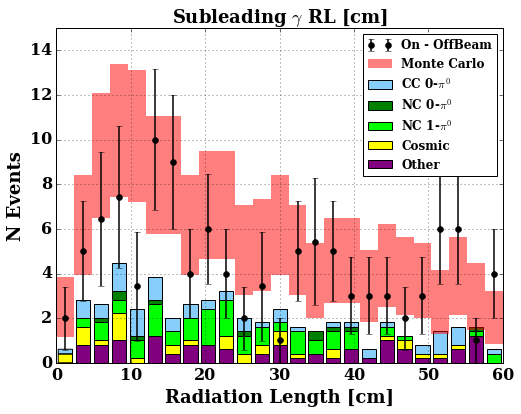

In [311]:
var = 'pi0_low_radL'

fig,ax = plt.subplots(figsize=(8,6))
ax.hist([oth_v[var].values,cos_v[var].values,nc1pi0_v[var].values,nc0pi0_v[var].values,\
          cc0pi0_v[var].values],bins=nbins,label=labels_tst[:-1],color=colors_tst[:-1],stacked=True,\
         range=(0,60),weights=weights[:-1])
plt.bar(bins - bin_width/2,err_mc*2,bin_width,bottom = bnbcos_m - err_mc/2.,\
        alpha=0.5, color='r', linewidth=0,label='Monte Carlo')
plt.errorbar(bins,off_min_on_m,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12)#,loc='upper left',bbox_to_anchor=(1,0.9))
plt.grid(True)
plt.ylim(0,15)
plt.title('Subleading $\\gamma$ RL [cm]',fontweight='bold',fontsize=18)
plt.xlabel('Radiation Length [cm]',fontsize=18,weight='bold')
plt.ylabel('N Events',fontsize=18,weight='bold')
plt.savefig('Plots/Physics_pi0_pi0_subleading_photon_RL.png')

In [312]:
nbins = 20

x_on, y_on = np.histogram(df0._mu_len.values,bins=nbins,range=(0,600))
x_off, y_off = np.histogram(df1._mu_len.values,bins=nbins,range=(0,600))
x_bnb, y_bnb = np.histogram(df.mu_len.values,bins=nbins,range=(0,600))

bins = (y_off[:-1] + y_off[1:])/2
bin_width = bins[1]-bins[0]

bnbcos_m = x_bnb * mc_to_onbeam 
off_min_on_m = x_on - x_off*off_to_on

off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

err_on = np.sqrt(x_on)
err_off = np.sqrt(x_off)
err_data = np.sqrt(err_on * err_on + err_off * err_off)
err_mc = np.sqrt(bnbcos_m)

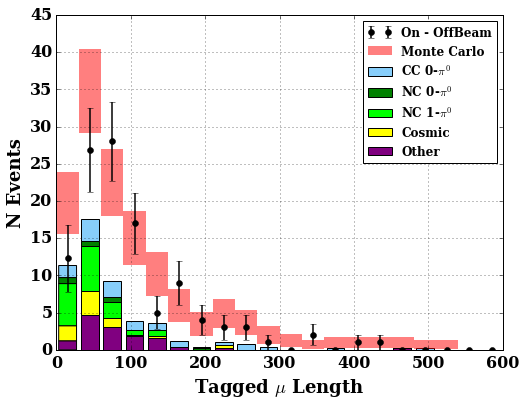

In [313]:
nbins = 20
var = 'mu_len'

plt.figure()
fig,ax = plt.subplots(figsize=(8,6))
ax.hist([oth_v[var].values,cos_v[var].values,nc1pi0_v[var].values,nc0pi0_v[var].values,\
          cc0pi0_v[var].values],bins=nbins,label=labels_tst[:-1],color=colors_tst[:-1],stacked=True,\
         range=(0,600),weights=weights[:-1])
plt.bar(bins - bin_width/2,err_mc*2,bin_width,bottom = bnbcos_m - err_mc/2.,\
        alpha=0.5, color='r', linewidth=0,label='Monte Carlo')
plt.errorbar(bins,off_min_on_m,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12) #,loc='upper left',bbox_to_anchor=(1,0.9))
plt.grid(True)
plt.xlabel('Tagged $\mu$ Length',fontsize=18,weight='bold')
plt.ylabel('N Events',fontsize=18,weight='bold')
plt.savefig('Plots/Physics_pi0_mu_len.png')

In [314]:
nbins = 20
Emax = 400

x_on, y_on = np.histogram(np.cos(df0._mu_angle.values),bins=nbins,range=(0,1))
x_off, y_off = np.histogram(np.cos(df1._mu_angle.values),bins=nbins,range=(0,1))
x_bnb, y_bnb = np.histogram(df.mu_angle.values,bins=nbins,range=(0,1))

bins = (y_off[:-1] + y_off[1:])/2
bin_width = bins[1]-bins[0]

bnbcos_m = x_bnb * mc_to_onbeam 
off_min_on_m = x_on - x_off*off_to_on
off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

err_on = np.sqrt(x_on)
err_off = np.sqrt(x_off)
err_data = np.sqrt(err_on * err_on + err_off * err_off)
err_mc = np.sqrt(bnbcos_m)

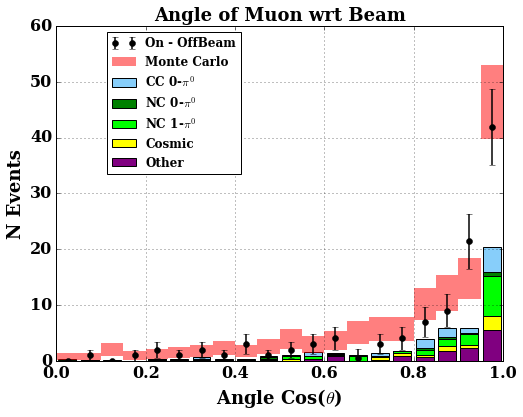

In [315]:
var = 'mu_angle'

fig,ax = plt.subplots(figsize=(8,6))
ax.hist([oth_v[var].values,cos_v[var].values,nc1pi0_v[var].values,nc0pi0_v[var].values,\
          cc0pi0_v[var].values],bins=nbins,label=labels_tst[:-1],color=colors_tst[:-1],stacked=True,\
         range=(0,1),weights=weights[:-1])
plt.bar(bins - bin_width/2,err_mc*2,bin_width,bottom = bnbcos_m - err_mc/2.,\
        alpha=0.5, color='r', linewidth=0,label='Monte Carlo')
plt.errorbar(bins,off_min_on_m,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12,loc='upper left',bbox_to_anchor=(.1,1)) 
plt.grid(True)
plt.xlabel('Angle Cos($\\theta$)',fontsize=18,weight='bold')
plt.title('Angle of Muon wrt Beam',fontweight='bold',fontsize=18)
plt.ylabel('N Events',fontsize=18,weight='bold')
#plt.yscale('log')
plt.ylim(0,60)
plt.xlim(0,1)
plt.savefig('Plots/Physics_pi0_mu_angle.png')

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 23 columns):
event            554 non-null int32
bkgd_id          554 non-null int32
vtx_x            554 non-null float32
vtx_y            554 non-null float32
vtx_z            554 non-null float32
mu_angle         554 non-null float32
mu_len           554 non-null float32
mu_startx        554 non-null float32
mu_starty        554 non-null float32
mu_startz        554 non-null float32
mu_endx          554 non-null float32
mu_endy          554 non-null float32
mu_endz          554 non-null float32
mu_phi           554 non-null float32
mu_mom           554 non-null float32
mult             554 non-null float32
pi0_mass         554 non-null float32
pi0_oangle       554 non-null float32
pi0_mom          554 non-null float32
pi0_low_shrE     554 non-null float32
pi0_high_shrE    554 non-null float32
pi0_low_radL     554 non-null float32
pi0_high_radL    554 non-null float32
dtypes: float32(21), int3

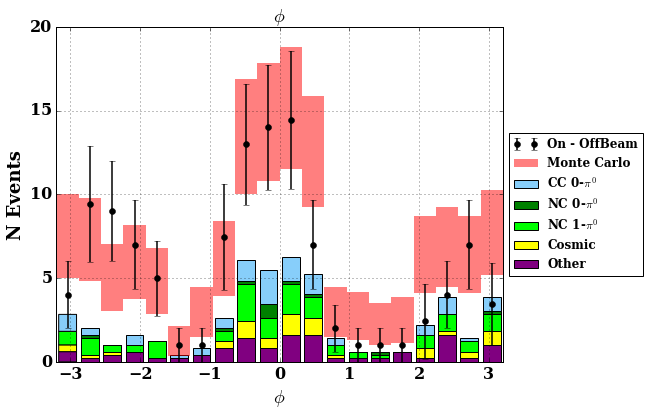

In [317]:
nbins = 20

x_on, y_on = np.histogram(df0._mu_phi.values,bins=nbins,  range=(-3.2,3.2))
x_off, y_off = np.histogram(df1._mu_phi.values,bins=nbins,range=(-3.2,3.2))
x_bnb, y_bnb = np.histogram(df.mu_phi.values,bins=nbins,  range=(-3.2,3.2))

bins = (y_off[:-1] + y_off[1:])/2
bin_width = bins[1]-bins[0]

bnbcos_m = x_bnb * mc_to_onbeam 
off_min_on_m = x_on - x_off*off_to_on
off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

err_on = np.sqrt(x_on)
err_off = np.sqrt(x_off)
err_data = np.sqrt(err_on * err_on + err_off * err_off)
err_mc = np.sqrt(bnbcos_m)

nbins = 20
var = 'mu_phi'

fig,ax = plt.subplots(figsize=(8,6))
ax.hist([oth_v[var].values,cos_v[var].values,nc1pi0_v[var].values,nc0pi0_v[var].values,\
          cc0pi0_v[var].values],bins=nbins,label=labels_tst[:-1],color=colors_tst[:-1],stacked=True,\
         range=(-3.2,3.2),weights=weights[:-1])
plt.bar(bins - bin_width/2,err_mc*2,bin_width,bottom = bnbcos_m - err_mc/2.,\
        alpha=0.5, color='r', linewidth=0,label='Monte Carlo')
plt.errorbar(bins,off_min_on_m,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12,loc='upper left',bbox_to_anchor=(1,0.7)) 
plt.grid(True)
plt.xlabel('$\\phi$',fontsize=18,weight='bold')
plt.title('$\\phi$',fontweight='bold',fontsize=18)
plt.ylabel('N Events',fontsize=18,weight='bold')
plt.ylim(0,20)
plt.xlim(-3.2,3.2)
plt.savefig('Plots/Physics_pi0_mu_phi.png')

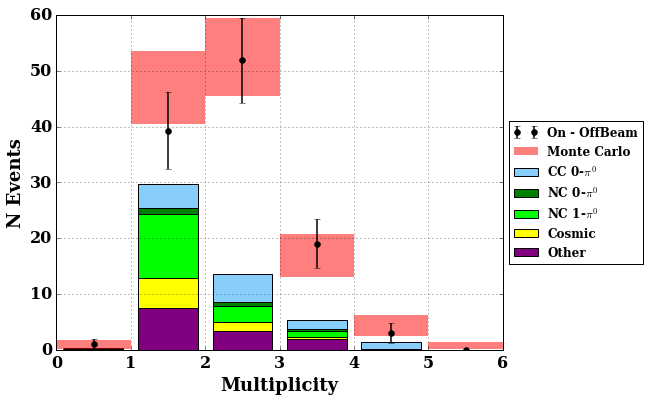

In [318]:
nbins = 6

x_on, y_on = np.histogram(df0._mult.values,bins=nbins,  range=(0,6))
x_off, y_off = np.histogram(df1._mult.values,bins=nbins,range=(0,6))
x_bnb, y_bnb = np.histogram(df.mult.values,bins=nbins,  range=(0,6))

bins = (y_off[:-1] + y_off[1:])/2
bin_width = bins[1]-bins[0]

bnbcos_m = x_bnb * mc_to_onbeam 
off_min_on_m = x_on - x_off*off_to_on
off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

err_on = np.sqrt(x_on)
err_off = np.sqrt(x_off)
err_data = np.sqrt(err_on * err_on + err_off * err_off)
err_mc = np.sqrt(bnbcos_m)

var = 'mult'

fig,ax = plt.subplots(figsize=(8,6))
ax.hist([oth_v[var].values,cos_v[var].values,nc1pi0_v[var].values,nc0pi0_v[var].values,\
          cc0pi0_v[var].values],bins=nbins,label=labels_tst[:-1],color=colors_tst[:-1],stacked=True,\
         range=(0,6),weights=weights[:-1])
plt.bar(bins - bin_width/2,err_mc*2,bin_width,bottom = bnbcos_m - err_mc/2.,\
        alpha=0.5, color='r', linewidth=0,label='Monte Carlo')
plt.errorbar(bins,off_min_on_m,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12,loc='upper left',bbox_to_anchor=(1,0.7)) 
plt.grid(True)
plt.xlabel('Multiplicity',fontsize=18,weight='bold')
plt.ylabel('N Events',fontsize=18,weight='bold')
plt.savefig('Plots/Physics_pi0_mu_mult.png')